<a href="https://colab.research.google.com/github/gizattos/beer_consumption_regression/blob/master/Predicao_quantidade_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando o dataset "Beer Consumption - São Paulo" crie um modelo para prever a quantidade de cerveja que será consumida, para esse trabalho, desconsidere a variável independente 'data'. Discuta sobre a tarefa, o dataset, valores nulos, feature engineering, escolha do modelo, métrica de erro, complexidade vs erro, overfitting e underfitting.

In [0]:
## importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h2>Lendo CSV</h2>

In [0]:
df = pd.read_csv('/content/Consumo_cerveja.csv')

<h2>Explorando e realizando o pré-processamento dos dados</h2>

In [500]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [0]:
## dropando linhas que possuem todos seus valores zerados	
df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)

In [503]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [504]:
## Visualizando se o dataset possui dados faltantes
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [505]:
## Visualizando informações estatísticas sobre as variáveis  
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [0]:
## alterando variáveis string para float e alterando separados de casa decimal
lista = ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']
for x in lista:
  df[x] = df[x].str.replace(',', '.').astype('float')
  

In [0]:
## alterando data para datetime
df['Data'] = pd.to_datetime(df['Data'])

In [508]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


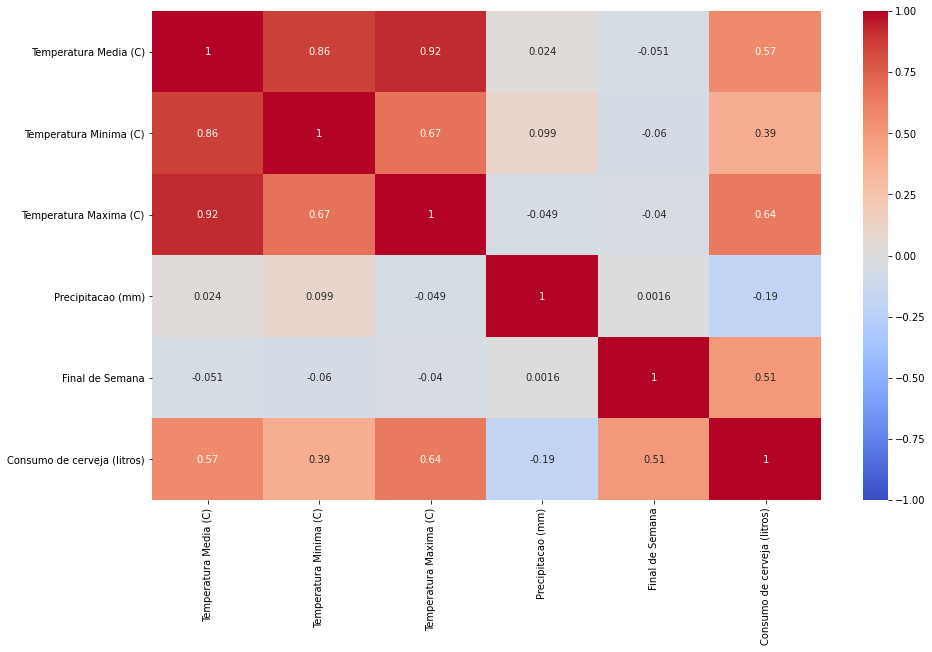

In [509]:
## verificando a correlação entre as variáveis
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()


In [0]:
#  Feature Engineering
#  criando nova coluna com o dia da semana 
#  Segunda-feira : 0
#  Terça-feira : 1
#  Quarta-feira : 2
#  Quinta-Feira : 3
#  Sexta-feira : 4
#  Sábado : 5
#  Domingo : 6
df['dia_semana'] =  df['Data'].dt.dayofweek

In [511]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,3
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,4
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,5
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,6
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,6
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,0
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,1
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,2


dia_semana
0    23.609635
1    24.355154
2    23.810385
3    24.076547
4    24.137885
5    28.837923
6    29.007519
Name: Consumo de cerveja (litros), dtype: float64


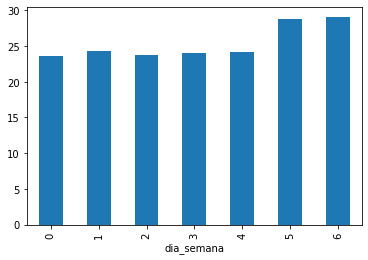

In [512]:
## qual dia se tem a maior média de cervaja ?
df.groupby(['dia_semana'])['Consumo de cerveja (litros)'].mean().plot(kind='bar')
print(df.groupby(['dia_semana'])['Consumo de cerveja (litros)'].mean())    


<h2>Algoritmo de predição - Regressão</h2>
<h3>Temperatura alta influência na quantidade de cerveja ingerida ? </h3>

In [513]:
## separando dataset
##x =  df.drop(['Data', 'Consumo de cerveja (litros)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)','Final de Semana','dia_semana'], axis=1)
x =  df['Temperatura Maxima (C)'].values.reshape(-1,1)
y = df['Consumo de cerveja (litros)'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(292, 1) (292, 1)
(73, 1) (73, 1)


In [514]:
## treinando modelo
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([[0.63376681]])

In [515]:
## MSE- Quanto maior, maior o erro
y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)


13.752758552219206

In [516]:
## RMSE - Raiz quadrada do MSE
np.sqrt(mean_squared_error(y_test,y_pred))

3.7084711879990664

In [517]:
## r2 - Modelo explica 37% dos resultados de teste
lr.score(x_test,y_test)

0.37936232376028123

In [518]:
## r2 - Modelo explica 41% dos resultados de treino
lr.score(x_train,y_train)

0.4130821613265998

<h3>Dado ao resultado de do r2 de 0.3793, o modelo utilizando apenas a variável de temperatura máxima é considerado um modelo underfit</h3>

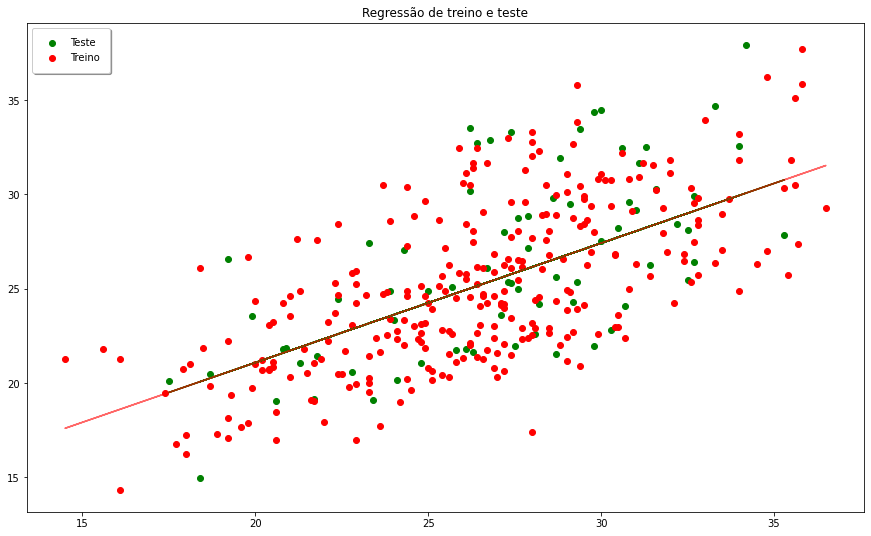

In [519]:
## plotando gráfico
plt.figure(figsize=(15,9))
plt.scatter(x_test, y_test, color = "green", label='Teste')
plt.plot(x_test, lr.predict(x_test), color = "green")
plt.scatter(x_train, y_train, color = "red", label='Treino')
plt.plot(x_train, lr.predict(x_train), color = "red",alpha=0.6)
plt.title("Regressão de treino e teste")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [520]:
##Predizendo a quantidade de litros de cerveja consumidos para um dia de quinta, que não chova e que faça 35 grau
lr.predict([[35]])

array([[30.58422272]])

<h3>Temperatura alta, precipitação e dia da semana influência na quantidade de cerveja ingerida  ?</h3>

In [521]:
## utilizando também Precipitacao (mm) e dia_semana
## separando dataset
x =  df.drop(['Data', 'Consumo de cerveja (litros)','Temperatura Minima (C)','Temperatura Media (C)',], axis=1)
y = df['Consumo de cerveja (litros)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(292, 4) (292,)
(73, 4) (73,)


In [522]:
## treinando modelo
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 6.68591271e-01, -4.38340796e-02,  5.16815228e+00, -3.78528967e-03])

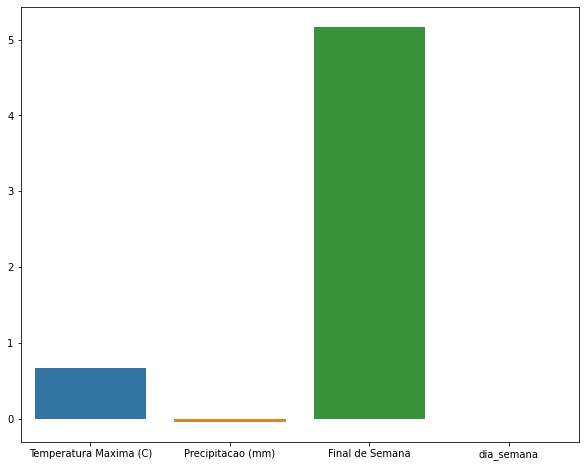

In [523]:
## verificando os pesos

plt.figure(figsize=(10,8))
sns.barplot(x = x_train.columns,y = lr.coef_)
plt.show()

<h3>É possível observar que as variáveis com o maior peso no modelo são Final de Semana e Temperatura máxima.</h3>

In [524]:
## MSE - Quanto maior, maior o erro
y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)


5.664066966602874

<h3>Após aplicar mais variáveis o MSE reduziu de 13.7527 para 5.6640, demonstrando que o novo modelo texe uma taxa de erro bem menos que o primeiro</h3>

In [525]:
## RMSE -  Raiz quadrada do MSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.379930033972191

In [526]:
## r2 - Modelo explica 71% dos resultados de treino
lr.score(x_train,y_train)

0.7101386044899705

In [527]:
## r2 - Modelo explica 74% dos resultados de teste
lr.score(x_test,y_test)

0.7443906728333196

<h3>Dado ao resultado de do r2 de 0.7443, o modelo utilizando múltiplas variáveis explicativas, diferentemente do primeiro modelo apresentado não pode ser considerado um underfit</h3>

In [528]:
## Predizendo a quantidade de litros de cerveja consumidos para um dia de quinta, que não chova e que faça 35 graus
lr.predict([[35,0,0,3]])

array([29.76227092])

<h2>O modelo com mais variáveis explicou melhor os dados existentes, tendo menor MSE, RMSE e maior r2. Essas métricas mostram que o modelo com multiplas váriaveis é melhor que o com apenas uma variável</h2>